In [1]:
import pandas as pd

In [25]:
df =pd.read_csv('./2020빅콘테스트 문제데이터(혁신아이디어분야)./04_유통데이터(GS리테일)/카테고리별.csv')

In [26]:
df.describe()

,ANTC_ITEM_LCLS_CD
count,480.000000
mean,45.000000
std,22.936783
min,10.000000
25%,27.500000
50%,45.000000
75%,62.500000
max,80.000000


In [27]:
df.head()

,PVN,BOR,ADMD,ANTC_ITEM_LCLS_CD,ANTC_ITEM_LCLS_NM,20190201,20190202,20190203,20190204,20190205,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,10,식사,28.8%,30.4%,27.6%,35.6%,31.8%,...,26.8%,24.3%,32.8%,30.0%,24.8%,26.5%,25.1%,24.0%,23.0%,32.5%
1,서울특별시,중구,소공동,20,간식,18.6%,22.7%,22.5%,23.8%,26.9%,...,19.5%,22.9%,18.1%,17.4%,17.7%,20.0%,19.6%,22.5%,21.3%,19.2%
2,서울특별시,중구,소공동,30,마실거리,38.4%,34.5%,27.2%,30.8%,31.9%,...,39.5%,40.2%,35.4%,41.2%,37.8%,42.9%,42.2%,43.0%,43.0%,37.5%
3,서울특별시,중구,소공동,40,홈&리빙,4.2%,2.8%,1.7%,1.5%,1.6%,...,3.6%,2.7%,2.7%,3.8%,4.6%,2.6%,4.3%,2.7%,4.2%,2.0%
4,서울특별시,중구,소공동,50,헬스&뷰티,8.1%,8.4%,18.8%,5.7%,6.2%,...,8.7%,7.7%,9.7%,6.5%,14.0%,6.8%,7.5%,6.2%,7.0%,7.0%


In [28]:
df.fillna('0.0%', inplace = True)

In [29]:
df.iloc[:14,5:15]

,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210
0,28.8%,30.4%,27.6%,35.6%,31.8%,33.0%,27.0%,27.0%,29.7%,33.1%
1,18.6%,22.7%,22.5%,23.8%,26.9%,20.9%,19.2%,20.3%,23.1%,22.1%
2,38.4%,34.5%,27.2%,30.8%,31.9%,33.5%,36.8%,39.6%,34.3%,33.3%
3,4.2%,2.8%,1.7%,1.5%,1.6%,3.6%,4.0%,3.1%,1.8%,2.4%
4,8.1%,8.4%,18.8%,5.7%,6.2%,6.9%,10.6%,8.4%,7.7%,6.7%
5,0.4%,0.3%,0.3%,0.6%,0.3%,0.4%,0.8%,0.4%,0.8%,0.5%
6,1.1%,0.7%,1.6%,1.8%,1.2%,0.4%,1.2%,0.9%,1.9%,1.2%
7,0.5%,0.3%,0.4%,0.2%,0.1%,1.1%,0.3%,0.3%,0.6%,0.6%
8,31.4%,31.9%,36.6%,35.9%,31.4%,35.1%,31.6%,29.2%,30.9%,35.1%
9,17.8%,16.5%,16.1%,15.8%,17.7%,15.8%,18.1%,17.6%,19.2%,17.5%


In [30]:
df_num = df.iloc[:,5:]

In [31]:
for i in range(df_num.shape[0]):
    for j in range(df_num.shape[1]):
        df_num.iloc[i,j] = float(df_num.iloc[i,j].replace('%',""))

In [32]:
df.iloc[:,5:] = df_num

In [33]:
df_s = df[df['PVN']=='서울특별시']
df_d = df[df['PVN']=='대구광역시']

In [34]:
df_s_ju = df_s[df_s['BOR']=='중구']
df_s_no = df_s[df_s['BOR']=='노원구']

In [35]:
df_s_ju_sum = df_s_ju.iloc[:,4:].groupby('ANTC_ITEM_LCLS_NM').sum()

In [36]:
df_19 = df_s_ju_sum.iloc[:,:120]

In [37]:
df_20 = df_s_ju_sum.iloc[:,120:]

In [38]:
df_20.columns

Index(['20200201', '20200202', '20200203', '20200204', '20200205', '20200206',
       '20200207', '20200208', '20200209', '20200210',
       ...
       '20200522', '20200523', '20200524', '20200525', '20200526', '20200527',
       '20200528', '20200529', '20200530', '20200531'],
      dtype='object', length=121)

In [39]:
df_20.columns = pd.to_datetime(df_20.columns).strftime('%m-%d')
df_19.columns = pd.to_datetime(df_19.columns).strftime('%m-%d')

In [41]:
df_19.T

ANTC_ITEM_LCLS_NM,간식,마실거리,사회활동,식사,임신/육아,취미&여가활동,헬스&뷰티,홈&리빙
02-01,313.4,496.8,16.8,495.7,3.6,16.6,89.4,67.6
02-02,360.3,511.0,19.8,456.2,6.2,9.7,89.9,46.9
02-03,345.7,430.6,21.4,448.7,4.6,10.6,199.4,39.6
02-04,371.6,470.1,21.7,469.6,7.8,15.2,98.3,45.6
02-05,400.1,494.0,19.9,433.7,9.6,12.3,93.9,36.7
...,...,...,...,...,...,...,...,...
05-27,292.5,509.7,12.1,494.6,5.8,6.1,134.7,44.3
05-28,310.1,572.0,15.7,460.2,6.2,5.0,75.4,55.0
05-29,317.2,588.4,15.7,438.2,5.3,5.8,75.1,54.0
05-30,307.8,574.2,16.5,460.2,5.9,5.3,80.5,49.4


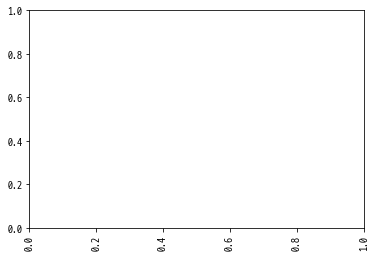

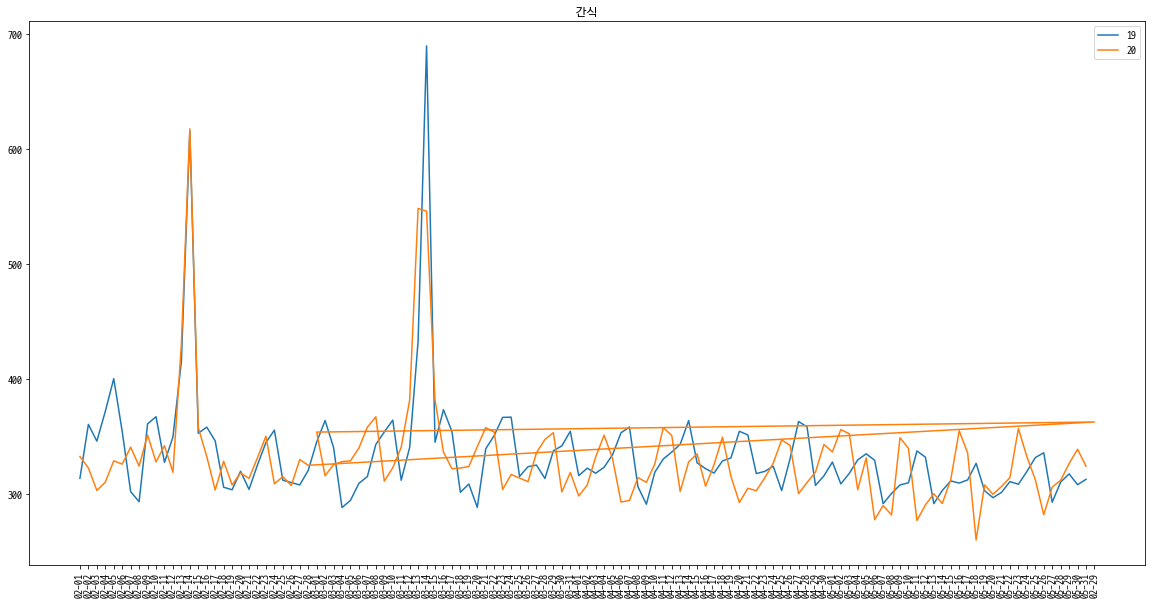

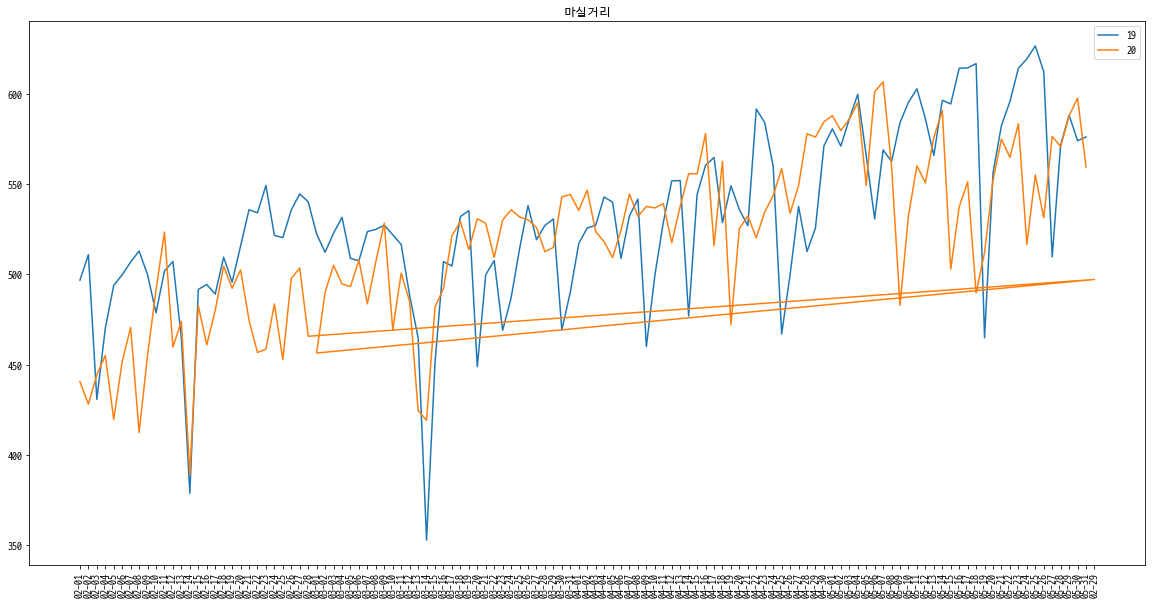

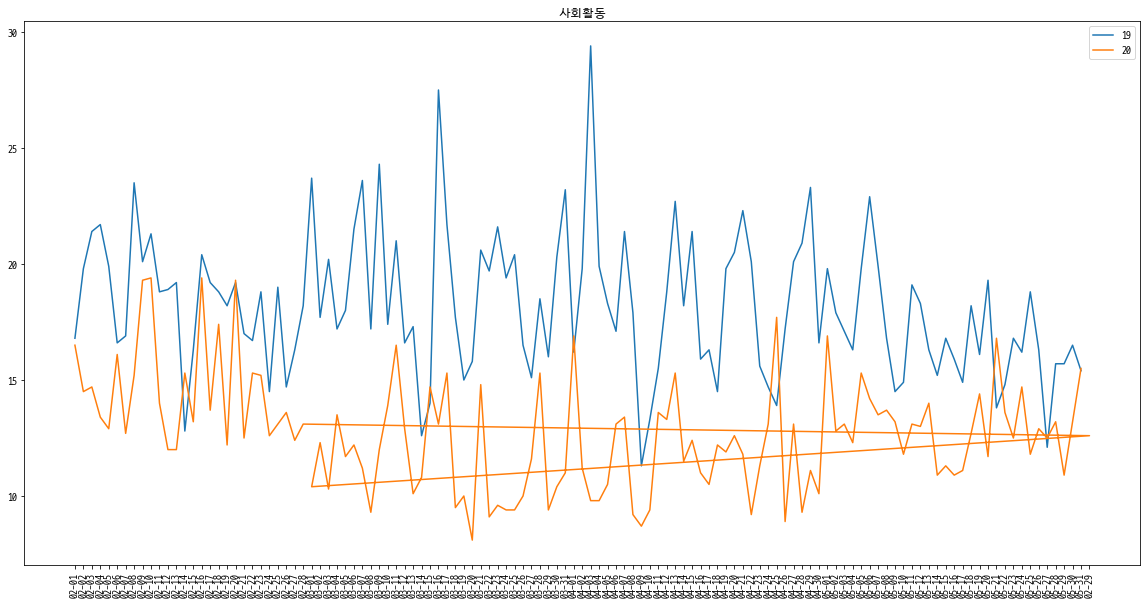

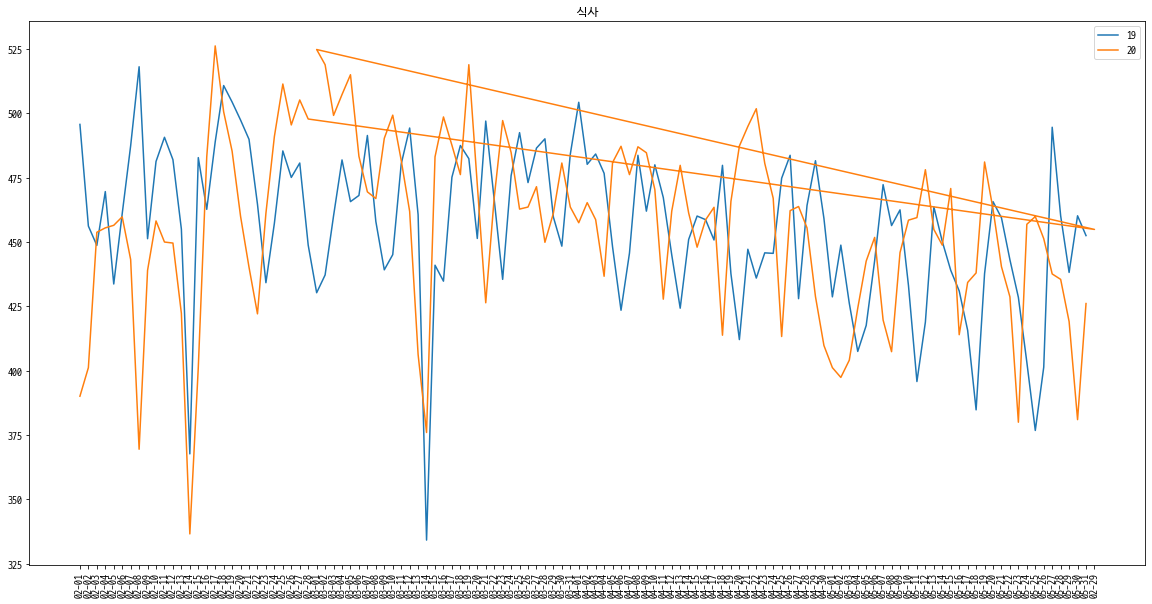

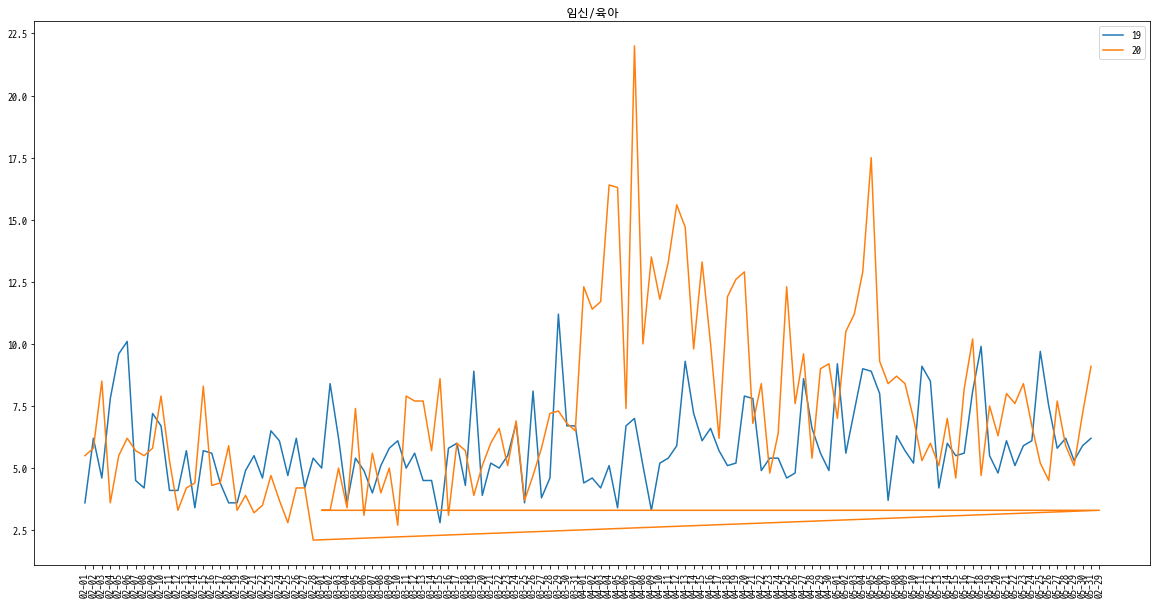

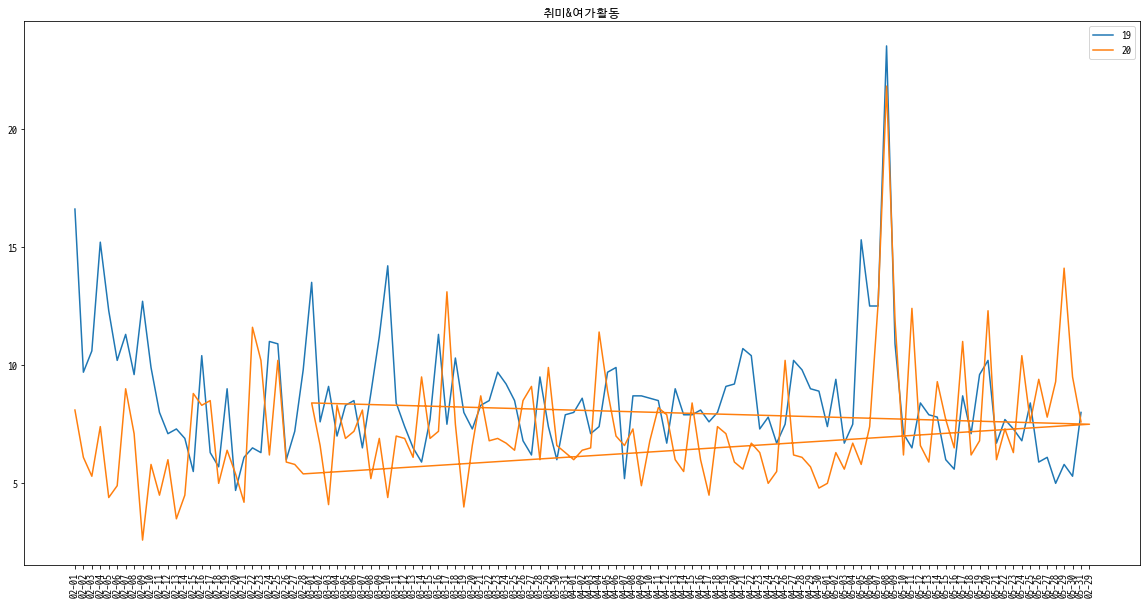

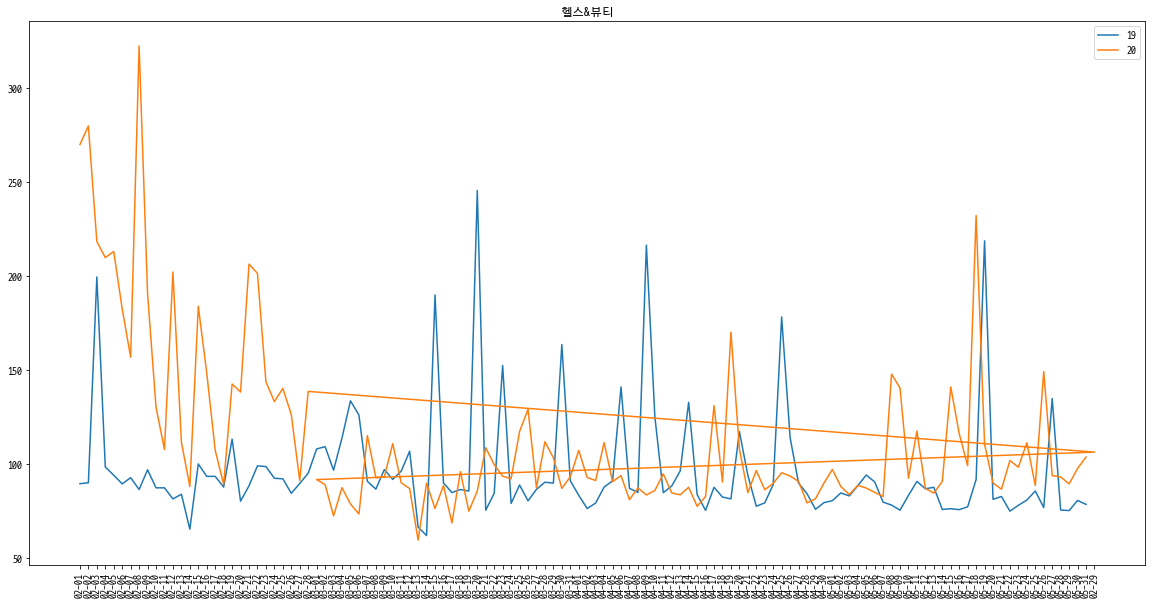

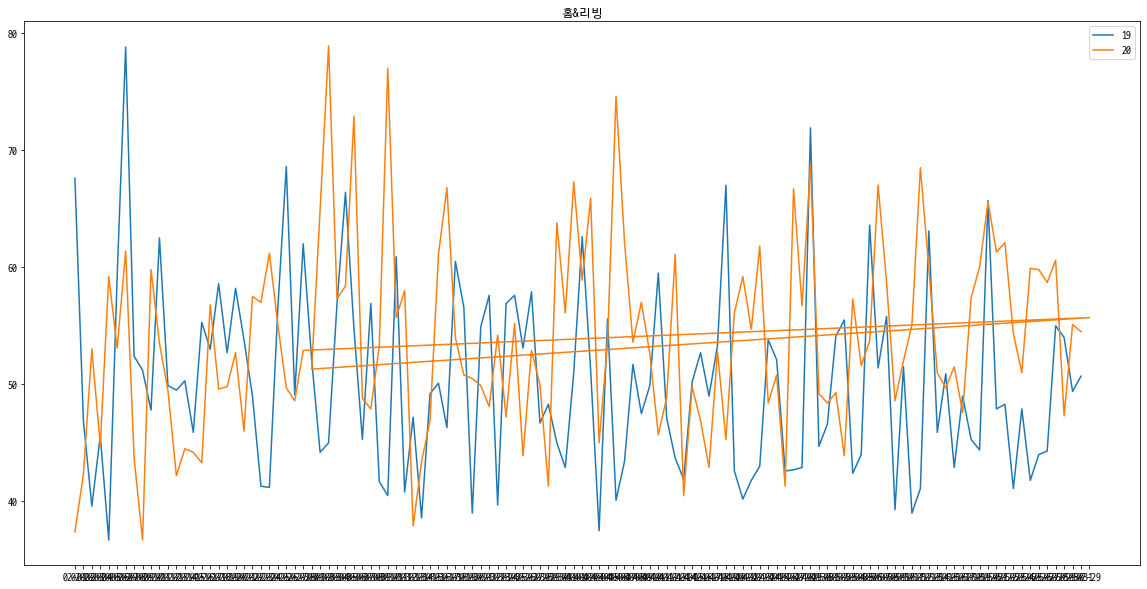

In [43]:
from matplotlib import pyplot as plt
for i in df_19.T.columns:
    df_1919=df_19.T[i]
    df_2020=df_20.T[i]
    plt.xticks(rotation=90)
    plt.figure(figsize=(20, 10))
    plt.title(i)
    plt.plot(df_1919, label = '19')
    plt.plot(df_2020, label = '20')
    plt.legend(loc='upper right')
    plt.show

In [110]:
df_2020

,index,홈&리빙
0,20200201,37.4
1,20200202,42.3
2,20200203,53.0
3,20200204,44.8
4,20200205,59.2
...,...,...
116,20200527,58.7
117,20200528,60.6
118,20200529,47.3
119,20200530,55.1


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

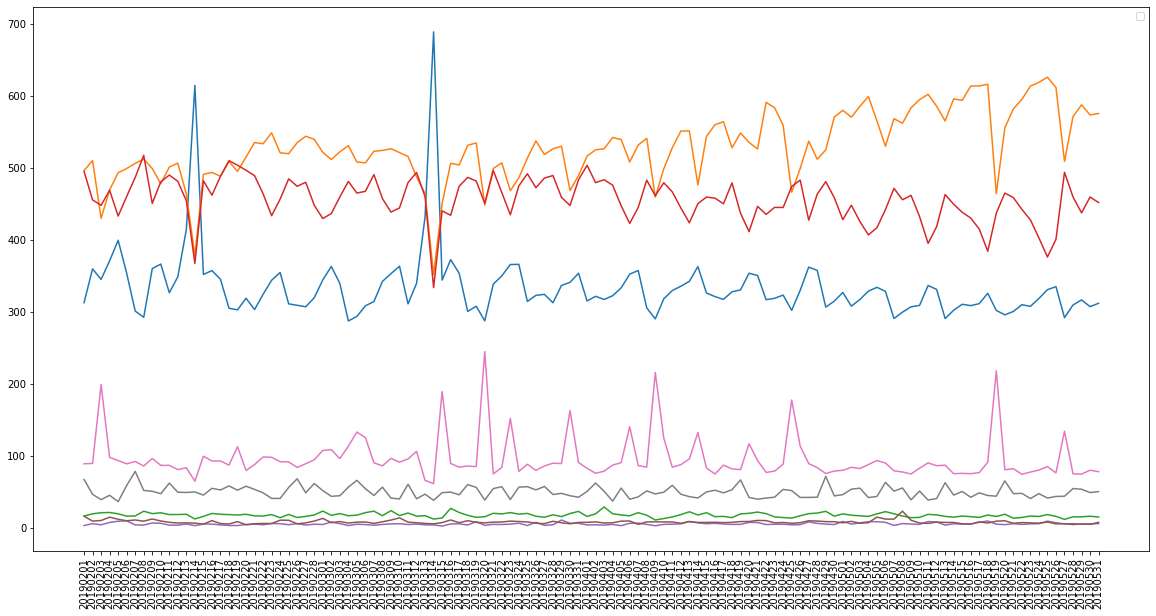

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.legend(loc='upper right')
plt.plot(df_19.T)
plt.xticks(rotation=90)
plt.show

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

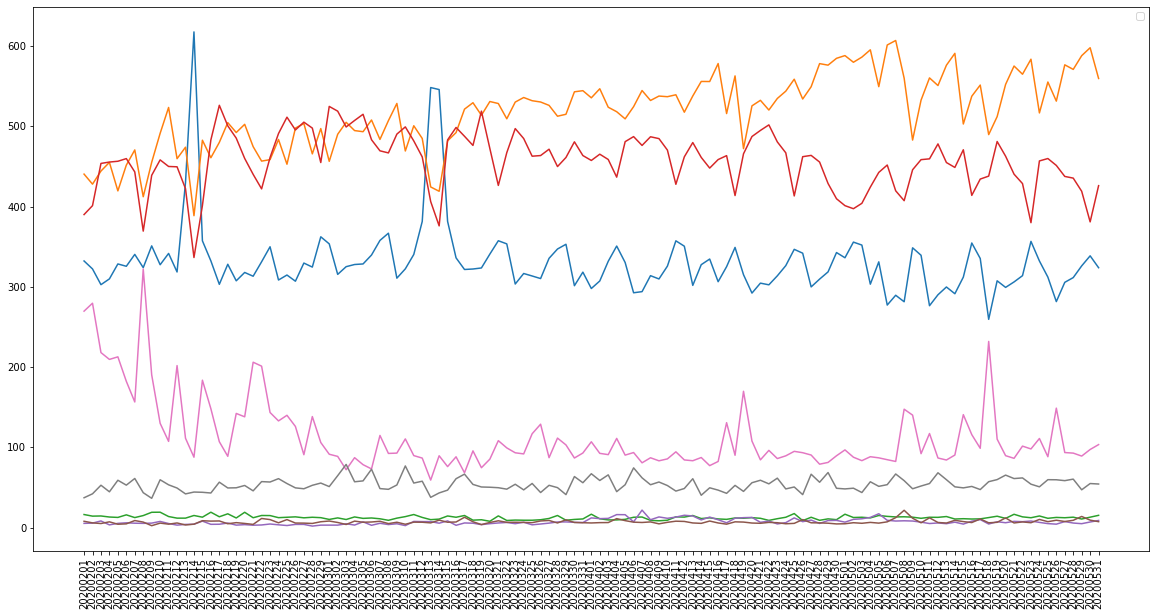

In [105]:

plt.figure(figsize=(20, 10))
plt.legend(loc='upper right')
plt.plot(df_20.T)
plt.xticks(rotation=90)
plt.show